In [1]:
import pandas as pd
import csv
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [2]:
"""
CHUNK_SIZE = 1000 # Number of rows to read at a time
header_written = False

with open("behavior_log.csv", "r") as in_file:
    reader = csv.reader(in_file)
    header = next(reader)

    with open("buy_behavior_log.csv", "a", newline='') as out_file:
        writer = csv.writer(out_file)
        if not header_written:
            writer.writerow(header)
            header_written = True

        chunk = []
        for i, row in enumerate(reader):
            if row[2] == "buy":
                chunk.append(row)
            if (i + 1) % CHUNK_SIZE == 0:
                writer.writerows(chunk)
                chunk = []
        writer.writerows(chunk)
#In this code, the CHUNK_SIZE variable determines the number of rows to be read and processed at a time.
# Use this code to generate buy_behaviour_log.csv file.
"""


'\nCHUNK_SIZE = 1000 # Number of rows to read at a time\nheader_written = False\n\nwith open("behavior_log.csv", "r") as in_file:\n    reader = csv.reader(in_file)\n    header = next(reader)\n\n    with open("buy_behavior_log.csv", "a", newline=\'\') as out_file:\n        writer = csv.writer(out_file)\n        if not header_written:\n            writer.writerow(header)\n            header_written = True\n\n        chunk = []\n        for i, row in enumerate(reader):\n            if row[2] == "buy":\n                chunk.append(row)\n            if (i + 1) % CHUNK_SIZE == 0:\n                writer.writerows(chunk)\n                chunk = []\n        writer.writerows(chunk)\n#In this code, the CHUNK_SIZE variable determines the number of rows to be read and processed at a time.\n# Use this code to generate buy_behaviour_log.csv file.\n'

In [3]:
#ad_feature = pd.read_csv('PycharmProjects/SPML/ad_feature.csv')
#ad_feature = pd.read_csv('ad_feature.csv')

In [4]:
#raw_sample = pd.read_csv('PycharmProjects/SPML/raw_sample.csv')
#raw_sample = pd.read_csv('raw_sample.csv')

In [5]:
#user_behavior_log = pd.read_csv('PycharmProjects/SPML/buy_behavior_log.csv')
buy_behavior = pd.read_csv('buy_behavior_log.csv')


In [6]:
#user_profile = pd.read_csv('PycharmProjects/SPML/user_profile.csv')

user_profile = pd.read_csv('user_profile.csv')

unique_age_levels = user_profile["age_level"].unique()

# Print the unique values of age_level
print(user_profile.columns)

user_profile.head(5)

Index(['userid', 'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation',
       'new_user_class_level '],
      dtype='object')


,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,234,0,5,2,5,NaN,3,0,3.0
1,523,5,2,2,2,1.0,3,1,2.0
2,612,0,8,1,2,2.0,3,0,NaN
3,1670,0,4,2,4,NaN,1,0,NaN
4,2545,0,10,1,4,NaN,3,0,NaN


In [7]:
buy_behavior.head(5)

,user,time_stamp,btag,cate,brand
0,916958,1493811673,buy,123,97176
1,916958,1493811809,buy,123,97176
2,628854,1493781424,buy,4262,370203
3,623496,1493810730,buy,4262,370203
4,1099015,1493774927,buy,9390,347564


In [8]:
unique_brands = buy_behavior["brand"].unique()
print(len(unique_brands))

206307


255


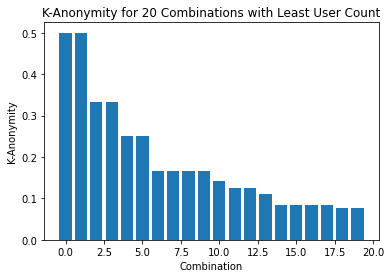

In [9]:
###### Identification attack user_groups ######

user_features = user_profile[['cms_segid', 'cms_group_id', 'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level ']]

# Drop rows with missing values
user_features = user_features.dropna()

# Get all possible combinations of the user features
combinations = []
for i in range(1, len(user_features.columns)+1):
    combinations += list(itertools.combinations(user_features.columns, i))
    
print(len(combinations))

combinations_count = {}
for combination in combinations:
    combination_count = len(user_features.groupby(list(combination)).size())
    combinations_count[combination] = combination_count

# Create a list of tuples from the dictionary items
counts_list = list(combinations_count.items())

# Sort the list by the count of users in ascending order
counts_list.sort(key=lambda x: x[1])

# Get the top 20 combinations with the least count
top_combinations = counts_list[:20]

# Create a list of the K-anonymity values for each combination
k_anonimity = [1/count[1] for count in top_combinations]

# Plot the K-anonymity values as a bar chart
plt.bar(range(len(k_anonimity)), k_anonimity)

# Add labels to the x and y axis and add a title to the plot
plt.xlabel('Combination')
plt.ylabel('K-Anonymity')
plt.title('K-Anonymity for 20 Combinations with Least User Count')

# Show the plot
plt.show()

In [10]:
#clicks_brand = pd.merge(raw_sample, ad_feature[['brand', 'adgroup_id']], how='left', on='adgroup_id')

In [11]:
#clicks_with_brand = pd.merge(left=raw_sample, right=ad_feature, how='inner', on='adgroup_id')

In [12]:
# Get the value counts of all brands
brand_counts = buy_behavior['brand'].value_counts()

# Calculate the index of the first and last brand you want to include
total_brands = len(brand_counts)
middle_index = total_brands // 2
first_index = middle_index - 7
last_index = middle_index + 8

# Get the average 5 interacted brands
average_15_brands = brand_counts.iloc[first_index:last_index].index.tolist()

# Filter the buy_behavior dataframe to only include the least 5 brands
average_15_buy_behavior = buy_behavior[buy_behavior['brand'].isin(average_15_brands)]
print(average_15_buy_behavior)

            user  time_stamp btag  cate   brand
308003    152833  1494573598  buy   771   47093
375930    698513  1494043523  buy  5751  273442
380392   1110839  1494065020  buy  6961  155973
380393   1110839  1494065020  buy  6961  155973
380394   1110839  1494065020  buy  6961  155973
...          ...         ...  ...   ...     ...
8540904   192332  1494374173  buy  4291  392210
8753534   393455  1494395802  buy  4539  184002
8840103   998342  1494474219  buy  7241  450094
8905963  1110839  1494481579  buy  6961  155973
9071094   283196  1494665810  buy  5944  237949

[75 rows x 5 columns]


In [13]:

#filter out columns not required
#join columns with behavior log and user datasets

#top_5_brands = buy_behavior['brand'].value_counts().head(5).index.tolist()
#top_5_buy_behavior = buy_behavior[buy_behavior['brand'].isin(top_5_brands)]


# Merge the top_5_buy_behavior and user_profile dataframes on the 'userid' column
merged_df = pd.merge(buy_behavior, user_profile, left_on='user', right_on='userid')


# Group the merged dataframe by the 'age_level' and 'brand' columns and get the count of each group
grouped_df = merged_df.groupby(['age_level', 'brand'], as_index=False).count()[['age_level', 'brand', 'user']]


# Pivot the grouped dataframe to create a pivot table with the 'age_level' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='age_level', values='user')
pivot_table = pivot_table.fillna(0)
print(pivot_table)













age_level    0     1     2     3     4     5     6
brand                                             
2          0.0   8.0  31.0  54.0  60.0  21.0   3.0
3          0.0   1.0   5.0  12.0   9.0   7.0   1.0
6          0.0   0.0   0.0   1.0   0.0   0.0   0.0
7          0.0  46.0  87.0  85.0  97.0  74.0  10.0
8          0.0  33.0  61.0  16.0   0.0  45.0   9.0
...        ...   ...   ...   ...   ...   ...   ...
461430     0.0   0.0   0.0   0.0   0.0   1.0   0.0
461447     0.0   0.0   0.0   0.0   1.0   0.0   0.0
461453     0.0   0.0   0.0   1.0   0.0   0.0   1.0
461457     0.0   0.0   1.0   0.0   0.0   0.0   0.0
461526     0.0   0.0   0.0   0.0   0.0   1.0   0.0

[204324 rows x 7 columns]


In [14]:
###### Following is a table generated that shows for top 5 brands how each age group interacts with each brand #########
##### Using this information we can create dummy figure 4  #####


# Get the total number of users for each age level
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the age level totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100
percent_table = percent_table.fillna(0)

ambiguity_table = 100 - percent_table

# Round the values in the ambiguity table to 2 decimal places
ambiguity_table = ambiguity_table.round(2)

# Print the ambiguity table
print(ambiguity_table)

age_level      0       1       2       3       4       5       6
brand                                                           
2          100.0   95.48   82.49   69.49   66.10   88.14   98.31
3          100.0   97.14   85.71   65.71   74.29   80.00   97.14
6          100.0  100.00  100.00    0.00  100.00  100.00  100.00
7          100.0   88.47   78.20   78.70   75.69   81.45   97.49
8          100.0   79.88   62.80   90.24  100.00   72.56   94.51
...          ...     ...     ...     ...     ...     ...     ...
461430     100.0  100.00  100.00  100.00  100.00    0.00  100.00
461447     100.0  100.00  100.00  100.00    0.00  100.00  100.00
461453     100.0  100.00  100.00   50.00  100.00  100.00   50.00
461457     100.0  100.00    0.00  100.00  100.00  100.00  100.00
461526     100.0  100.00  100.00  100.00  100.00    0.00  100.00

[204324 rows x 7 columns]


In [15]:
ambiguity_counts_age = {}

# Loop through each value in the ambiguity table and count the number of occurrences
for ambiguity_value in ambiguity_table.values.flatten():
    if ambiguity_value < 50.01:
        if ambiguity_value in ambiguity_counts_age:
            ambiguity_counts_age[ambiguity_value] += 1
        else:
            ambiguity_counts_age[ambiguity_value] = 1


# Sort the dictionary items by their keys
ambiguity_dict_age = dict(sorted(ambiguity_counts_age.items(), key=lambda x: x[0]))

# Print the sorted dictionary
print(ambiguity_dict_age)

{0.0: 67465, 0.41: 1, 1.4: 1, 1.49: 1, 1.85: 1, 2.17: 1, 2.22: 1, 2.41: 1, 2.78: 1, 3.03: 1, 3.23: 3, 3.45: 1, 3.53: 1, 3.92: 1, 4.0: 2, 4.17: 2, 4.19: 1, 4.32: 1, 4.35: 3, 4.55: 3, 4.76: 6, 5.0: 5, 5.13: 2, 5.26: 6, 5.56: 8, 5.71: 1, 5.88: 11, 6.06: 1, 6.25: 10, 6.45: 1, 6.67: 20, 6.9: 3, 6.98: 1, 7.14: 23, 7.32: 1, 7.41: 1, 7.5: 2, 7.69: 27, 8.0: 1, 8.11: 1, 8.33: 46, 8.51: 1, 8.57: 1, 8.7: 3, 8.77: 1, 9.05: 1, 9.09: 66, 9.38: 1, 9.52: 3, 9.68: 2, 10.0: 114, 10.34: 1, 10.53: 12, 10.71: 3, 10.81: 1, 10.84: 1, 11.11: 165, 11.27: 1, 11.29: 1, 11.32: 1, 11.49: 1, 11.54: 1, 11.58: 1, 11.76: 24, 12.0: 2, 12.12: 1, 12.2: 1, 12.28: 1, 12.5: 232, 12.7: 1, 12.96: 1, 13.04: 5, 13.33: 33, 13.51: 1, 13.64: 7, 13.79: 2, 13.89: 1, 13.95: 1, 14.29: 461, 14.58: 1, 14.71: 2, 14.73: 1, 14.81: 3, 15.0: 9, 15.09: 1, 15.15: 6, 15.25: 1, 15.38: 64, 15.62: 2, 15.66: 1, 15.69: 1, 15.79: 18, 15.83: 1, 15.91: 2, 16.0: 6, 16.13: 2, 16.22: 1, 16.33: 1, 16.67: 918, 16.85: 1, 16.95: 1, 17.14: 2, 17.24: 3, 17.39: 1

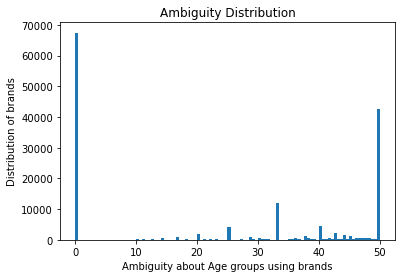

In [16]:
# `ambiguity_dict_age` is the sorted dictionary
x_values = list(ambiguity_dict_age.keys())
y_values = list(ambiguity_dict_age.values())

# Create a histogram with 10 bins
plt.hist(x_values, bins=100, weights=y_values)

# Add axis labels and a title
plt.xlabel('Ambiguity about Age groups using brands')
plt.ylabel('Distribution of brands')
plt.title('Ambiguity Distribution')

# Show the plot
plt.show()

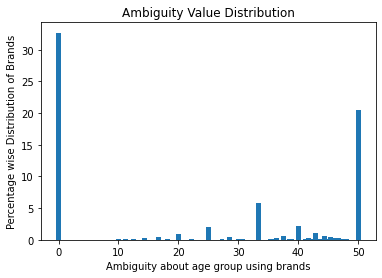

In [17]:
# `ambiguity_dict` is the sorted dictionary you created earlier
x_values = list(ambiguity_dict_age.keys())
y_values = list(ambiguity_dict_age.values())

# Calculate the percentage of each y_value over the total number of brands
total_brands = len(unique_brands)
y_percentages = [(count/total_brands)*100 for count in y_values]

# Plot the percentage values on a bar chart
plt.bar(x_values, y_percentages)
plt.xlabel('Ambiguity about age group using brands')
plt.ylabel('Percentage wise Distribution of Brands')
plt.title('Ambiguity Value Distribution')
plt.show()

In [18]:
## Filter the behavior log to only include the rows where the brand was part of Average 15 interacted brands vs Gender ##

# Get the value counts of all brands
brand_counts = buy_behavior['brand'].value_counts()

# Calculate the index of the first and last brand you want to include
total_brands = len(brand_counts)
middle_index = total_brands // 2
first_index = middle_index - 50
last_index = middle_index + 50

# Get the average 15 interacted brands
average_100_brands = brand_counts.iloc[first_index:last_index].index.tolist()

# Filter the buy_behavior dataframe to only include the least 15 brands
average_100_buy_behavior = buy_behavior[buy_behavior['brand'].isin(average_100_brands)]

#top_15_brands = buy_behavior['brand'].value_counts().head(50).index.tolist()
#top_15_buy_behavior = buy_behavior[buy_behavior['brand'].isin(top_15_brands)]


# Merge the top_5_buy_behavior and user_profile dataframes on the 'userid' column
merged_df = pd.merge(buy_behavior, user_profile, left_on='user', right_on='userid')
print(merged_df)

# Group the merged dataframe by the 'brand' and 'final_gender_code' columns and get the count of each group
grouped_df = merged_df.groupby(['brand', 'final_gender_code'], as_index=False).count()[['brand', 'final_gender_code', 'user']]
print(grouped_df)

# Pivot the grouped dataframe to create a pivot table with the 'brand' column as the index, the 'final_gender_code' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='final_gender_code', values='user')
pivot_table = pivot_table.fillna(0)
print(pivot_table)

           user  time_stamp btag  cate   brand  userid  cms_segid  \
0        916958  1493811673  buy   123   97176  916958         33   
1        916958  1493811809  buy   123   97176  916958         33   
2        916958  1494055722  buy  4267  178847  916958         33   
3        916958  1494037918  buy   123   97176  916958         33   
4        916958  1493811673  buy   123   97176  916958         33   
...         ...         ...  ...   ...     ...     ...        ...   
8825410  319183  1493526092  buy  2505  412044  319183         92   
8825411  889393  1493567745  buy  6181  264201  889393         60   
8825412  401828  1493532067  buy  1892  398556  401828          0   
8825413  614980  1493525415  buy  8998  224985  614980          0   
8825414  614980  1493525641  buy  8998  224985  614980          0   

         cms_group_id  final_gender_code  age_level  pvalue_level  \
0                   4                  2          4           2.0   
1                   4            

In [19]:
# Pivot the grouped dataframe to create a pivot table with the 'final_gender_code' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='final_gender_code', values='user')

# Get the total number of users for each gender
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the gender totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100
percent_table = percent_table.fillna(0)

# Compute the ambiguity metric values by subtracting the percent values from 100
ambiguity_table = 100 - percent_table

# Round the values in the ambiguity table to 2 decimal places
ambiguity_table = ambiguity_table.round(2)

# Print the ambiguity table
print(ambiguity_table)

ambiguity_counts = {}

# Loop through each value in the ambiguity table and count the number of occurrences
for ambiguity_value in ambiguity_table.values.flatten():
    if ambiguity_value < 50.01:
        if ambiguity_value in ambiguity_counts:
            ambiguity_counts[ambiguity_value] += 1
        else:
            ambiguity_counts[ambiguity_value] = 1


# Sort the dictionary items by their keys
ambiguity_dict = dict(sorted(ambiguity_counts.items(), key=lambda x: x[0]))

# Print the sorted dictionary
print(ambiguity_dict)

final_gender_code       1       2
brand                            
2                   63.84   36.16
3                   62.86   37.14
6                  100.00    0.00
7                   48.37   51.63
8                   75.00   25.00
...                   ...     ...
461430               0.00  100.00
461447             100.00    0.00
461453             100.00    0.00
461457             100.00    0.00
461526             100.00    0.00

[204324 rows x 2 columns]
{0.0: 93524, 0.36: 1, 0.51: 1, 0.57: 1, 0.62: 1, 0.68: 1, 0.79: 1, 0.8: 1, 0.82: 1, 0.83: 1, 0.84: 1, 0.85: 1, 0.88: 1, 0.9: 1, 0.95: 1, 0.97: 1, 0.98: 1, 0.99: 1, 1.03: 1, 1.14: 1, 1.15: 1, 1.17: 1, 1.18: 1, 1.2: 1, 1.25: 3, 1.27: 1, 1.3: 1, 1.39: 1, 1.41: 1, 1.43: 1, 1.45: 2, 1.47: 3, 1.48: 1, 1.49: 2, 1.5: 1, 1.52: 1, 1.54: 2, 1.56: 2, 1.59: 1, 1.61: 2, 1.64: 4, 1.67: 3, 1.69: 3, 1.71: 1, 1.72: 4, 1.74: 1, 1.79: 3, 1.8: 1, 1.82: 2, 1.85: 4, 1.87: 1, 1.89: 1, 1.9: 1, 1.92: 5, 1.94: 1, 1.96: 6, 2.0: 3, 2.02: 1, 2.04: 7, 2.08

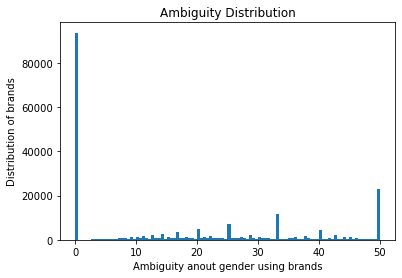

In [20]:
# `ambiguity_dict` is the sorted dictionary you created earlier
x_values = list(ambiguity_dict.keys())
y_values = list(ambiguity_dict.values())

# Create a histogram with 10 bins
plt.hist(x_values, bins=100, weights=y_values)

# Add axis labels and a title
plt.xlabel('Ambiguity anout gender using brands')
plt.ylabel('Distribution of brands')
plt.title('Ambiguity Distribution')

# Show the plot
plt.show()


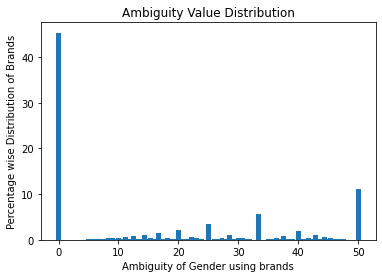

In [21]:
# `ambiguity_dict` is the sorted dictionary you created earlier
x_values = list(ambiguity_dict.keys())
y_values = list(ambiguity_dict.values())

# Calculate the percentage of each y_value over the total number of brands
total_brands = len(unique_brands)
y_percentages = [(count/total_brands)*100 for count in y_values]

# Plot the percentage values on a bar chart
plt.bar(x_values, y_percentages)
plt.xlabel('Ambiguity of Gender using brands')
plt.ylabel('Percentage wise Distribution of Brands')
plt.title('Ambiguity Value Distribution')
plt.show()

In [22]:
top_brands = buy_behavior['brand'].value_counts().head(5).index.tolist()
top_brands_data = buy_behavior[buy_behavior['brand'].isin(top_brands)]

merged_data = pd.merge(top_brands_data, user_profile, left_on='user', right_on='userid')
# Drop the 'userid' column since it contains the same values as 'user'
merged_data = merged_data.drop('userid', axis=1)

brand_combinations = list(itertools.combinations(top_brands, 2))


In [23]:

import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


result_df = pd.DataFrame(columns=['age_level', 'final_gender_code'])

for brand_combo in brand_combinations:
    brand1, brand2 = brand_combo
    brand_data = merged_data[(merged_data['brand']==brand1) & (merged_data['user'].isin(merged_data[merged_data['brand']==brand2]['user'].tolist()))]
    brand_data['brand2'] = brand2
    user_data = brand_data[['user','brand', 'brand2', 'age_level', 'final_gender_code']]
    result_df = result_df.append(user_data, ignore_index=True)
result_df = result_df.drop_duplicates(keep='first')

# Combine the brand and brand2 columns into a single column called "brand_combined"
result_df['brand_combined'] = result_df['brand'].fillna(0).astype(int).astype(str) + '_' + result_df['brand2'].fillna(0).astype(int).astype(str)

# Drop the original brand and brand2 columns
result_df.drop(['brand', 'brand2'], axis=1, inplace=True)
print(result_df)

       age_level final_gender_code       user brand_combined
0              3                 2   230906.0  370203_388700
2              3                 1  1024116.0  370203_388700
3              4                 1   872106.0  370203_388700
6              3                 1   903513.0  370203_388700
7              5                 2   862985.0  370203_388700
...          ...               ...        ...            ...
185978         5                 2   243751.0  224985_425589
185980         4                 2   133860.0  224985_425589
185981         5                 2  1080754.0  224985_425589
185983         4                 1   272553.0  224985_425589
185984         3                 1   872082.0  224985_425589

[80168 rows x 4 columns]


In [33]:
# Group the merged dataframe by the 'age_level' and 'brand' columns and get the count of each group
grouped_df = result_df.groupby(['final_gender_code', 'brand_combined'], as_index=False).count()[['final_gender_code', 'brand_combined', 'user']]
print(grouped_df)

# Pivot the grouped dataframe to create a pivot table with the 'age_level' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand_combined', columns='final_gender_code', values='user')
pivot_table = pivot_table.fillna(0)
print(pivot_table)

    final_gender_code brand_combined   user
0                   1  224985_425589    349
1                   1  247789_224985    531
2                   1  247789_425589    415
3                   1  370203_224985   2728
4                   1  370203_247789   3232
5                   1  370203_388700  15669
6                   1  370203_425589   3162
7                   1  388700_224985    953
8                   1  388700_247789   1086
9                   1  388700_425589   1056
10                  2  224985_425589    703
11                  2  247789_224985   1934
12                  2  247789_425589   1179
13                  2  370203_224985   6152
14                  2  370203_247789  10053
15                  2  370203_388700  20787
16                  2  370203_425589   4639
17                  2  388700_224985   1582
18                  2  388700_247789   2626
19                  2  388700_425589   1332
final_gender_code      1      2
brand_combined                 
224985_42558

In [34]:
# Get the total number of users for each gender
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the gender totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100
percent_table = percent_table.fillna(0)

# Compute the ambiguity metric values by subtracting the percent values from 100
ambiguity_table = 100 - percent_table

# Round the values in the ambiguity table to 2 decimal places
ambiguity_table = ambiguity_table.round(2)

# Print the ambiguity table
print(ambiguity_table)

ambiguity_counts = {}

# Loop through each value in the ambiguity table and count the number of occurrences
for ambiguity_value in ambiguity_table.values.flatten():
    if ambiguity_value < 50.01:
        if ambiguity_value in ambiguity_counts:
            ambiguity_counts[ambiguity_value] += 1
        else:
            ambiguity_counts[ambiguity_value] = 1


# Sort the dictionary items by their keys
ambiguity_dict = dict(sorted(ambiguity_counts.items(), key=lambda x: x[0]))

# Print the sorted dictionary
print(ambiguity_dict)


final_gender_code      1      2
brand_combined                 
224985_425589      66.83  33.17
247789_224985      78.46  21.54
247789_425589      73.96  26.04
370203_224985      69.28  30.72
370203_247789      75.67  24.33
370203_388700      57.02  42.98
370203_425589      59.47  40.53
388700_224985      62.41  37.59
388700_247789      70.74  29.26
388700_425589      55.78  44.22
{21.54: 1, 24.33: 1, 26.04: 1, 29.26: 1, 30.72: 1, 33.17: 1, 37.59: 1, 40.53: 1, 42.98: 1, 44.22: 1}


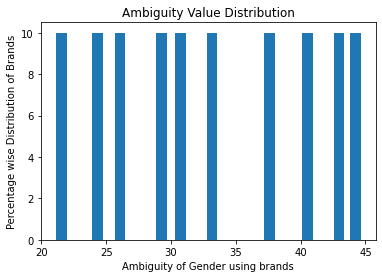

In [35]:
# `ambiguity_dict` is the sorted dictionary you created earlier
x_values = list(ambiguity_dict.keys())
y_values = list(ambiguity_dict.values())

# Calculate the percentage of each y_value over the total number of brands
total_brands = 10
y_percentages = [(count/total_brands)*100 for count in y_values]

# Plot the percentage values on a bar chart
plt.bar(x_values, y_percentages)
plt.xlabel('Ambiguity of Gender using brands')
plt.ylabel('Percentage wise Distribution of Brands')
plt.title('Ambiguity Value Distribution')
plt.show()

In [28]:
# Group the merged dataframe by the 'age_level' and 'brand' columns and get the count of each group
grouped_df = result_df.groupby(['age_level', 'brand_combined'], as_index=False).count()[['age_level', 'brand_combined', 'user']]
print(grouped_df)

# Pivot the grouped dataframe to create a pivot table with the 'age_level' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand_combined', columns='age_level', values='user')
pivot_table = pivot_table.fillna(0)
print(pivot_table)

    age_level brand_combined  user
0           0  247789_425589     3
1           0  370203_224985     1
2           0  370203_247789     7
3           0  370203_388700     7
4           0  370203_425589     2
..        ...            ...   ...
62          6  370203_388700   402
63          6  370203_425589   115
64          6  388700_224985    29
65          6  388700_247789    36
66          6  388700_425589    47

[67 rows x 3 columns]
age_level         0       1       2        3       4       5      6
brand_combined                                                     
224985_425589   0.0    27.0   127.0    341.0   313.0   223.0   21.0
247789_224985   0.0    86.0   381.0    791.0   702.0   463.0   42.0
247789_425589   3.0    69.0   226.0    499.0   410.0   347.0   40.0
370203_224985   1.0   410.0  2058.0   2997.0  2014.0  1295.0  105.0
370203_247789   7.0   936.0  3207.0   4263.0  2920.0  1812.0  140.0
370203_388700   7.0  3042.0  9366.0  11087.0  7144.0  5408.0  402.0
370203_425589

In [30]:
# Get the total number of users for each gender
brand_totals = pivot_table.sum(axis=1)
print(brand_totals)

# Divide the values in the pivot table by the gender totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100
percent_table = percent_table.fillna(0)

# Compute the ambiguity metric values by subtracting the percent values from 100
ambiguity_table = 100 - percent_table

# Round the values in the ambiguity table to 2 decimal places
ambiguity_table = ambiguity_table.round(2)

# Print the ambiguity table
print(ambiguity_table)

ambiguity_counts = {}

# Loop through each value in the ambiguity table and count the number of occurrences
for ambiguity_value in ambiguity_table.values.flatten():
    if ambiguity_value < 50.01:
        if ambiguity_value in ambiguity_counts:
            ambiguity_counts[ambiguity_value] += 1
        else:
            ambiguity_counts[ambiguity_value] = 1


# Sort the dictionary items by their keys
ambiguity_dict = dict(sorted(ambiguity_counts.items(), key=lambda x: x[0]))

# Print the sorted dictionary
print(ambiguity_dict)


brand_combined
224985_425589     1052.0
247789_224985     2465.0
247789_425589     1594.0
370203_224985     8880.0
370203_247789    13285.0
370203_388700    36456.0
370203_425589     7801.0
388700_224985     2535.0
388700_247789     3712.0
388700_425589     2388.0
dtype: float64
age_level            0      1      2      3      4      5      6
brand_combined                                                  
224985_425589   100.00  97.43  87.93  67.59  70.25  78.80  98.00
247789_224985   100.00  96.51  84.54  67.91  71.52  81.22  98.30
247789_425589    99.81  95.67  85.82  68.70  74.28  78.23  97.49
370203_224985    99.99  95.38  76.82  66.25  77.32  85.42  98.82
370203_247789    99.95  92.95  75.86  67.91  78.02  86.36  98.95
370203_388700    99.98  91.66  74.31  69.59  80.40  85.17  98.90
370203_425589    99.97  94.63  80.26  67.90  75.99  82.72  98.53
388700_224985   100.00  93.93  75.03  66.31  78.93  86.94  98.86
388700_247789    99.95  91.81  75.40  69.42  78.99  85.40  99.03
38870

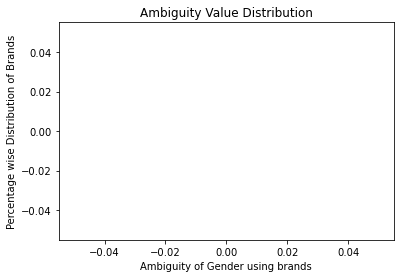

In [31]:
# `ambiguity_dict` is the sorted dictionary you created earlier
x_values = list(ambiguity_dict.keys())
y_values = list(ambiguity_dict.values())

# Calculate the percentage of each y_value over the total number of brands
total_brands = 5
y_percentages = [(count/total_brands)*100 for count in y_values]

# Plot the percentage values on a bar chart
plt.bar(x_values, y_percentages)
plt.xlabel('Ambiguity of Gender using brands')
plt.ylabel('Percentage wise Distribution of Brands')
plt.title('Ambiguity Value Distribution')
plt.show()